# DS 241 Project 2024

## Group Members:
Tiaan Viviers $25070401$

Abraham de Villiers $$

Lydia Laubscher $$

In [2]:
# import nessecary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import chi2_contingency

In [7]:
#import data
df = pd.read_csv('../data/ShopAlot.csv')

#TODO: Delete previous line and uncomment this for submission
#df = pd.read_csv('ShopAlot.csv')

# Exploratory Data Analysis

In [22]:
# retrieve basic information about dataset
print(f"Shape of the dataset: {df.shape}"); print()
df.info()

Shape of the dataset: (15000, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            15000 non-null  float64
 1   Month            15000 non-null  object 
 2   AgeInMonths      15000 non-null  int64  
 3   ProfileInMonths  15000 non-null  int64  
 4   Subscribed       4065 non-null   object 
 5   NumPrevOrders    15000 non-null  int64  
 6   AvgSpend         15000 non-null  float64
 7   POSR             15000 non-null  float64
 8   OPR              15000 non-null  float64
 9   Online           15000 non-null  int64  
 10  Discount         15000 non-null  int64  
 11  ShippingOption   15000 non-null  object 
 12  Platform         15000 non-null  object 
 13  Payment          15000 non-null  object 
 14  Ad_1             15000 non-null  object 
 15  Ad_2             15000 non-null  object 
 16  Ad_3             15000 

Dataset has contains 15000 values for each column, except for 'Subscribed' and 'SocialMedia' which have missing values.

Dataset contains 9 Numerical variables, 13 Categorical Variables.

In [11]:
# Investigate missing values
df.isnull().sum()

Sales                  0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed         10935
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount               0
ShippingOption         0
Platform               0
Payment                0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia         9050
ShippingPayment        0
Category               0
DayOfWeek              0
Province               0
dtype: int64

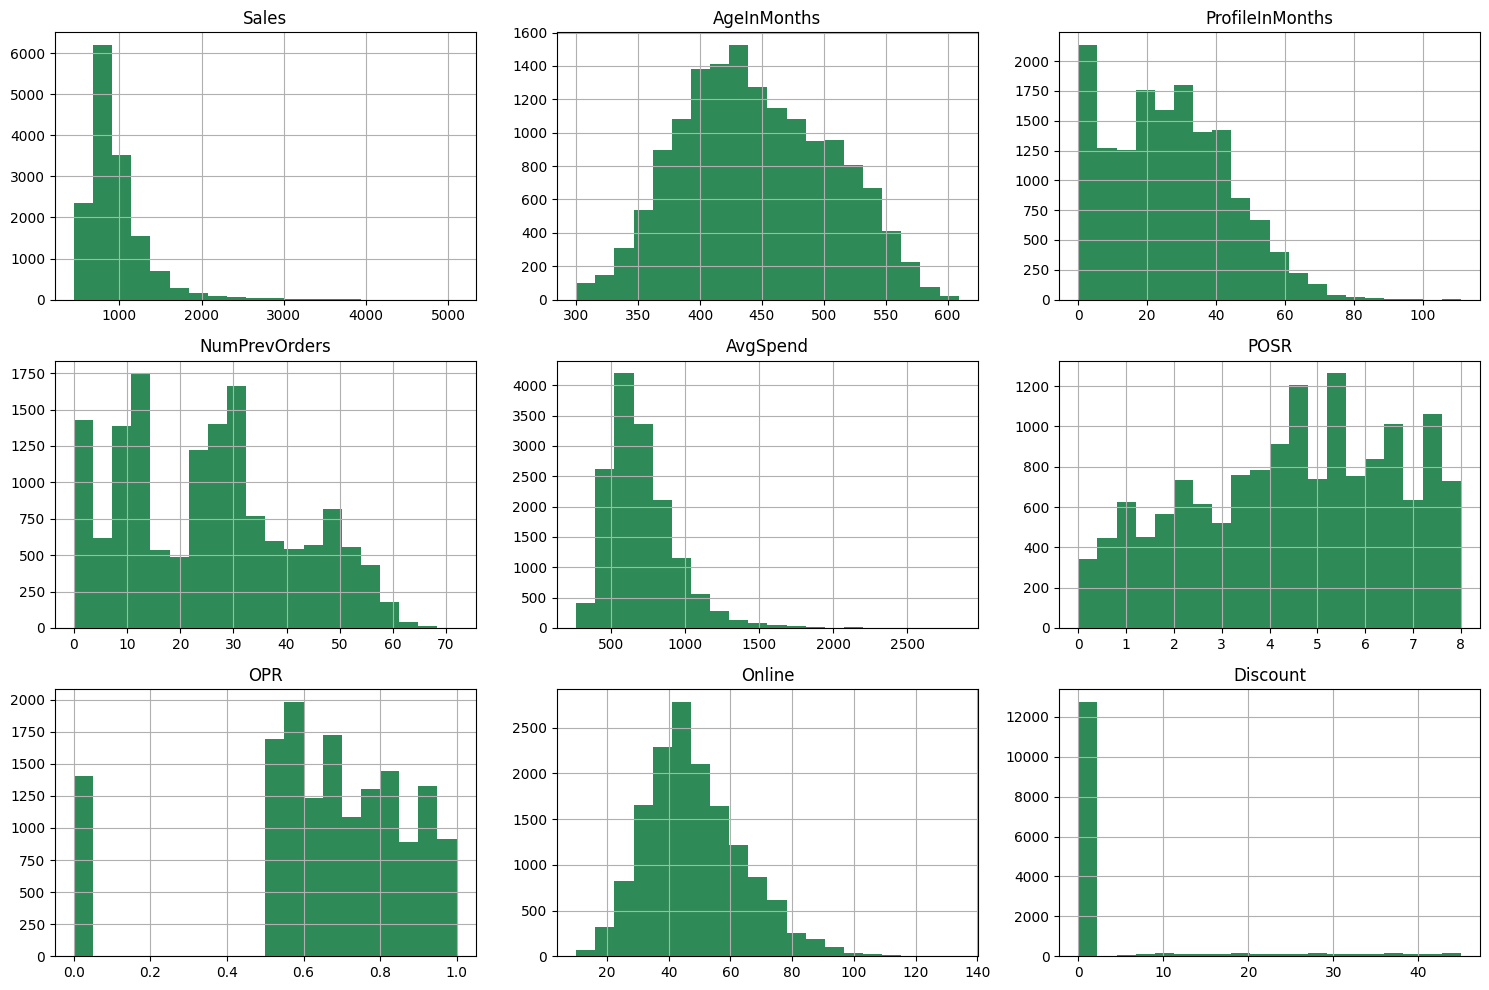

In [17]:
# Visualize distribution of numerical variables
df.hist(bins=20, figsize=(15,10), color='seagreen')
plt.tight_layout()
plt.show()

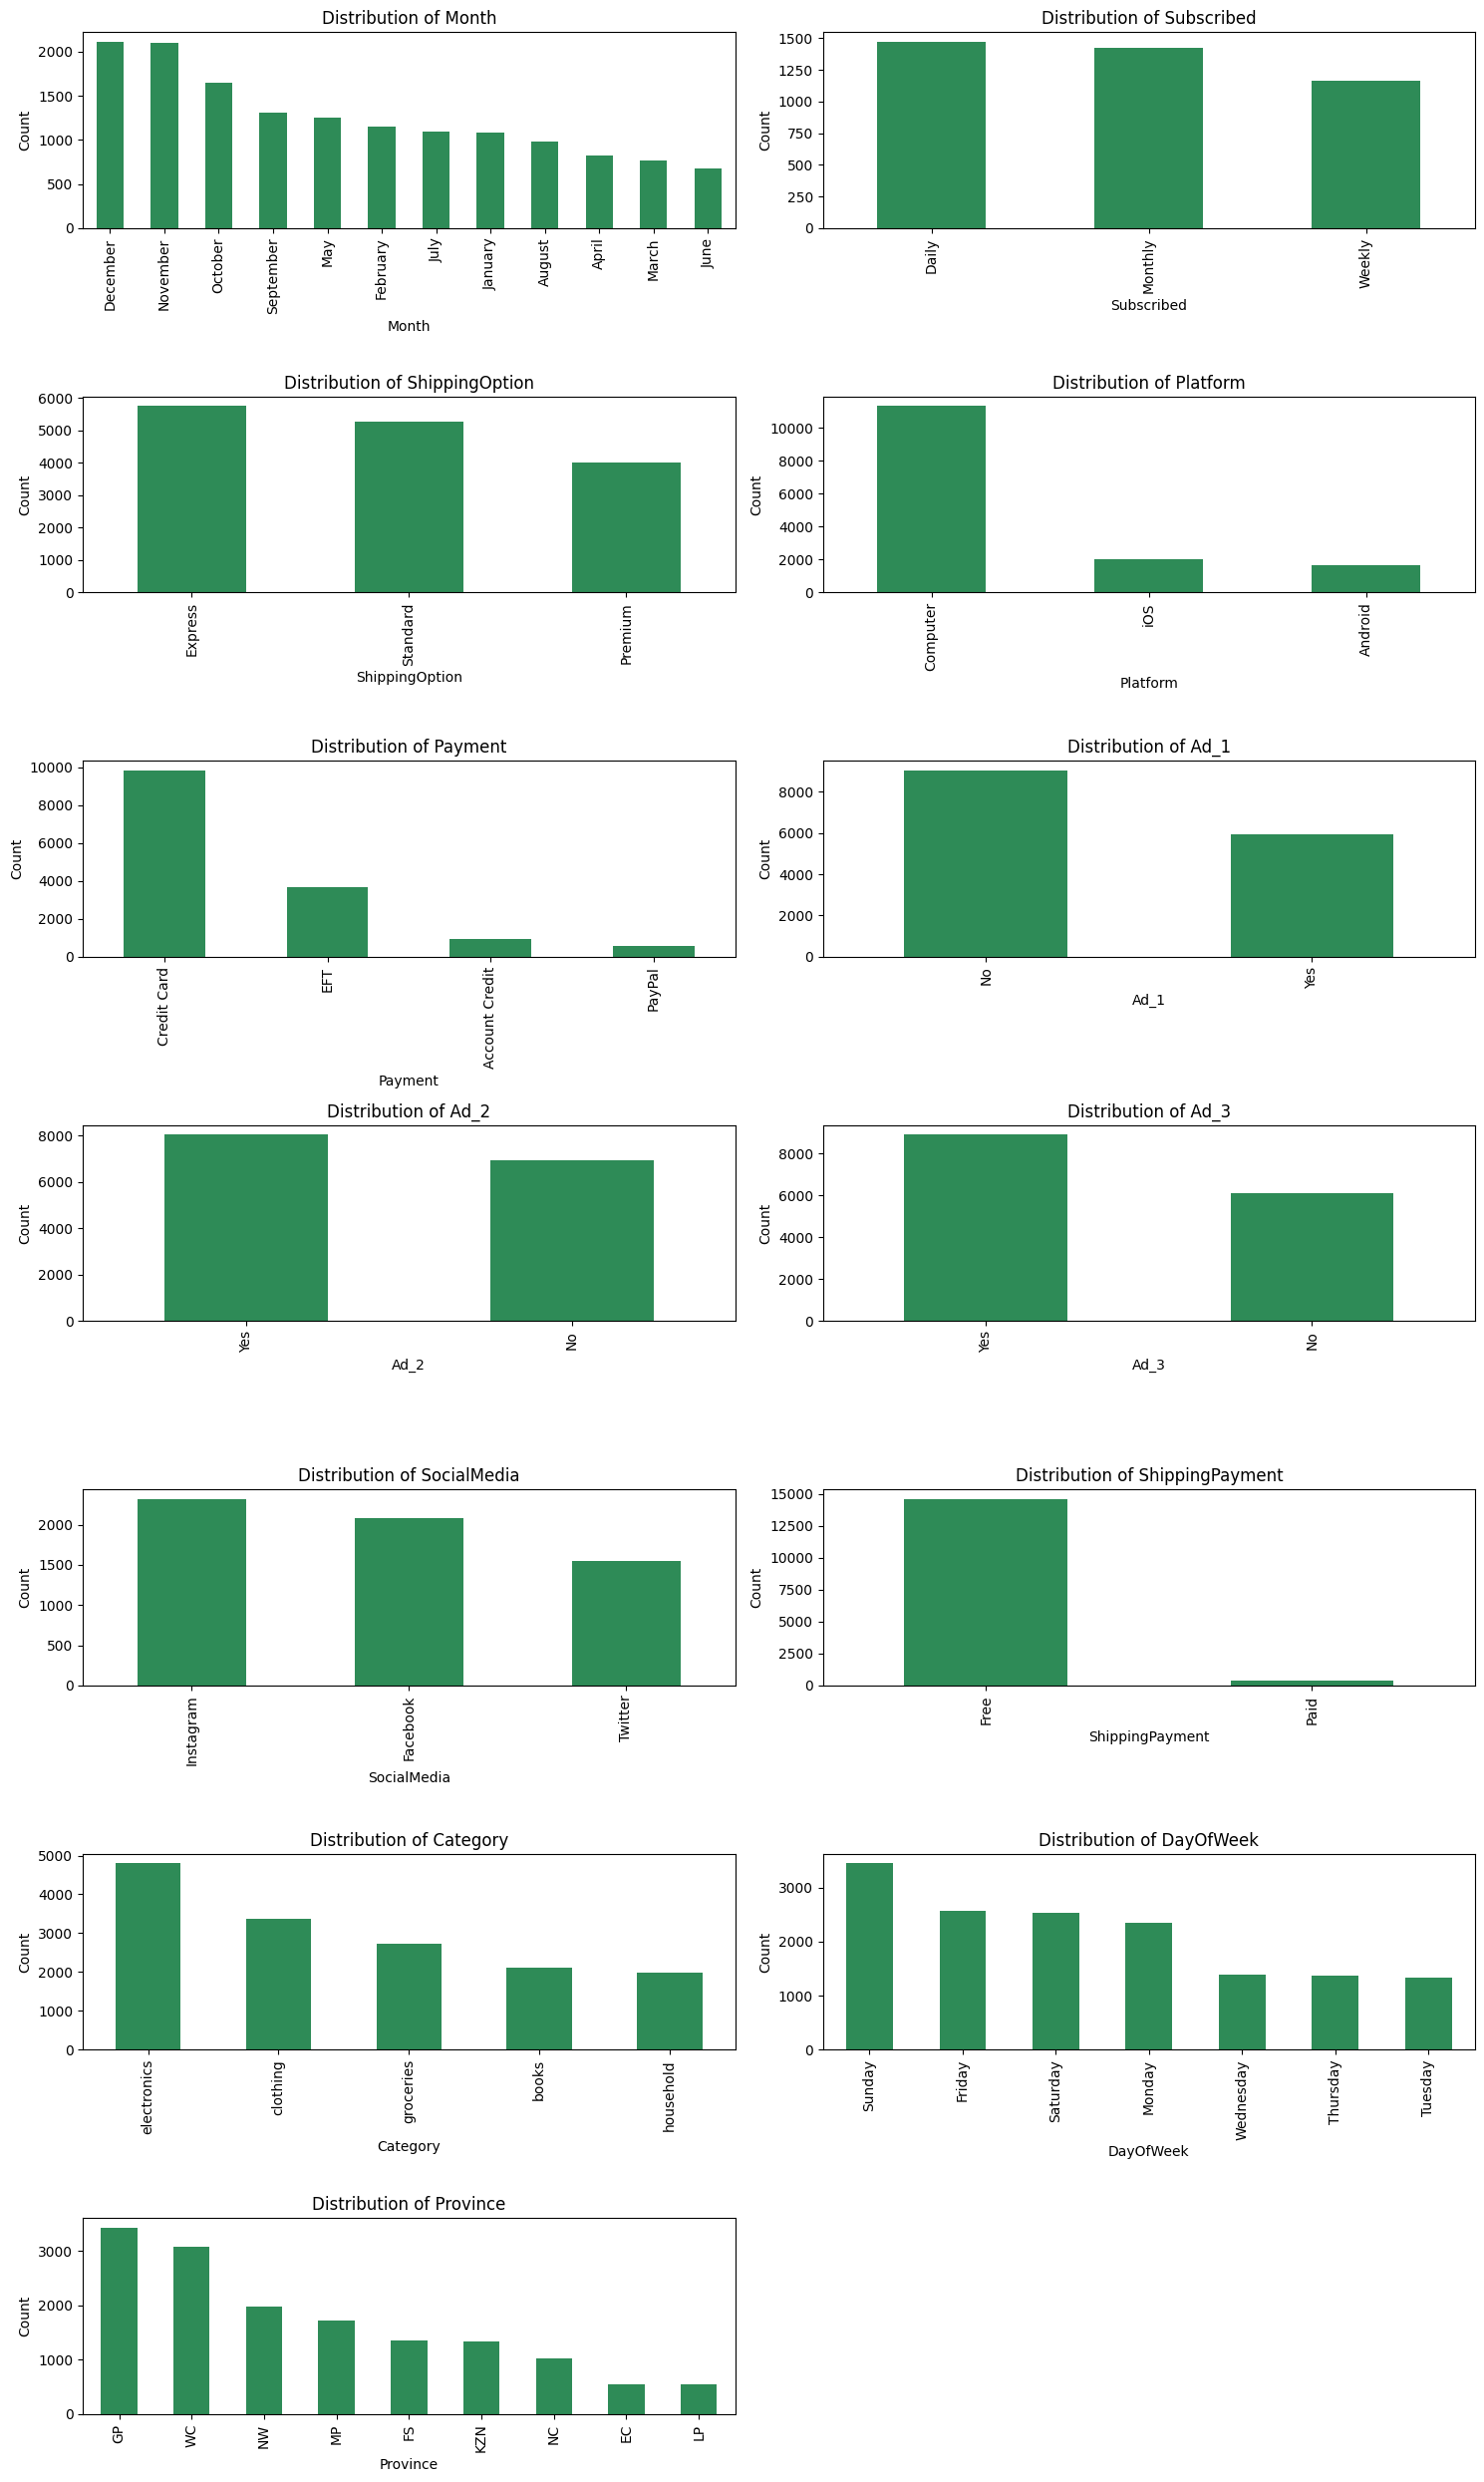

In [25]:
# Visualize distribution of categorical variables
categorical_columns = ['Month', 'Subscribed', 'ShippingOption', 'Platform', 'Payment', 
                       'Ad_1', 'Ad_2', 'Ad_3', 'SocialMedia', 'ShippingPayment', 
                       'Category', 'DayOfWeek', 'Province']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='seagreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()